### 📘 **Project Summary: Apple Stock Forecasting & Strategy Backtesting**

This project simulates a real-world financial data pipeline using both **NoSQL (MongoDB)** and **SQL (SQLite)** systems, combined with machine learning models and time series forecasting.

---

### 🔧 **Workflow Breakdown**:

1. **Data Acquisition**  
   - Collected 1-month historical data for **Apple (AAPL)** and **S&P 500 (SPY)** using `yfinance`.

2. **Data Storage**  
   - Stored raw price and volume data in **MongoDB** (ideal for semi-structured financial feeds).  
   - Transformed and saved model-ready returns and engineered features in **SQLite** (optimized for relational analytics).

3. **Exploratory Data Analysis (EDA)**  
   - Visualized **price trends**, **daily returns**, and **volatility** analysis.  
   - Created a **correlation heatmap** for technical insights.  
   - **5-day moving average (SMA)** to analyze short-term trends and smooth price fluctuations.

4. **Feature Engineering**  
   - Engineered features such as **lagged returns**, **5-day volatility**, and **directional (up/down) target classification** for model input.

5. **Machine Learning Models**  
   - Applied **Linear Regression** and **Random Forest Regressor** for predicting returns.  
   - Developed **Random Forest Classifier** to generate trading signals based on price movements.

6. **Strategy Backtesting**  
   - Created a **model-driven trading strategy**.  
   - Compared it with the **Buy & Hold strategy** using **cumulative returns**.  
   - Evaluated both strategies with performance metrics such as **Sharpe Ratio** and **directional accuracy**.

7. **Forecasting with ARIMA**  
   - Applied the **ARIMA(5,1,0)** model to forecast **short-term stock prices** for Apple.

---

### 🧠 **Real-World Value**  
This notebook demonstrates a complete **quantitative research** and **trading strategy pipeline**, showcasing:

- **Hybrid storage systems** (MongoDB + SQLite).  
- **Backtesting and forecasting** capabilities.  
- **End-to-end reproducibility**, from data collection to actionable insights.


In [3]:
#### "Analyze Apple's stock behavior over the past month and understand its performance trends." #####



import matplotlib.pyplot as plt
import yfinance as yf
from pymongo import MongoClient
from datetime import datetime


In [4]:
# Fetch stock data
apple = yf.Ticker("AAPL")
apple_data = apple.history(period="1mo")
apple_data.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-03-25 00:00:00-04:00,220.770004,224.100006,220.080002,223.750000,34493600,0.0,0.0
2025-03-26 00:00:00-04:00,223.509995,225.020004,220.470001,221.529999,34466100,0.0,0.0
2025-03-27 00:00:00-04:00,221.389999,224.990005,220.559998,223.850006,37094800,0.0,0.0
2025-03-28 00:00:00-04:00,221.669998,223.809998,217.679993,217.899994,39818600,0.0,0.0
2025-03-31 00:00:00-04:00,217.009995,225.619995,216.229996,222.130005,65299300,0.0,0.0
2025-04-01 00:00:00-04:00,219.809998,223.679993,218.899994,223.190002,36412700,0.0,0.0
2025-04-02 00:00:00-04:00,221.320007,225.190002,221.020004,223.889999,35905900,0.0,0.0
2025-04-03 00:00:00-04:00,205.539993,207.490005,201.250000,203.190002,103419000,0.0,0.0
2025-04-04 00:00:00-04:00,193.889999,199.880005,187.339996,188.380005,125910900,0.0,0.0


In [7]:
benchmark=yf.Ticker('SPY')
benchmark_data = benchmark.history(period="1mo")
benchmark_data.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2025-03-25 00:00:00-04:00,575.299988,576.409973,573.690002,575.460022,38355700,0.0,0.0,0.0
2025-03-26 00:00:00-04:00,575.190002,576.330017,567.190002,568.590027,51848300,0.0,0.0,0.0
2025-03-27 00:00:00-04:00,567.179993,570.900024,564.940002,567.080017,42164200,0.0,0.0,0.0
2025-03-28 00:00:00-04:00,565.530029,566.270020,555.070007,555.659973,71662700,0.0,0.0,0.0
2025-03-31 00:00:00-04:00,549.830017,560.710022,546.869995,559.390015,95328200,0.0,0.0,0.0
2025-04-01 00:00:00-04:00,557.450012,562.940002,553.679993,560.969971,54609600,0.0,0.0,0.0
2025-04-02 00:00:00-04:00,555.049988,567.419983,554.809998,564.520020,76014500,0.0,0.0,0.0
2025-04-03 00:00:00-04:00,545.109985,547.969971,536.700012,536.700012,125986000,0.0,0.0,0.0
2025-04-04 00:00:00-04:00,523.669983,525.869995,505.059998,505.279999,217965100,0.0,0.0,0.0


In [8]:

# Reset index to move Date from index to a column
apple_data.reset_index(inplace=True)
benchmark_data.reset_index(inplace=True)

# Convert to list of dicts and add symbol key
apple_records = apple_data.to_dict("records")
for record in apple_records:
    record["symbol"] = "AAPL"

benchmark_records = benchmark_data.to_dict("records")
for record in benchmark_records:
    record["symbol"] = "SPY"

# Connect to MongoDB
client = MongoClient("mongodb://localhost:27017/")
db = client["capital_market"]
collection = db["stocks_1mo"]

# Optional: remove old data
collection.delete_many({"symbol": {"$in": ["AAPL", "SPY"]}})

# Insert records
collection.insert_many(apple_records)
collection.insert_many(benchmark_records)

print("✅ Apple and SPY data saved to MongoDB!")


✅ Apple and SPY data saved to MongoDB!


In [11]:
import pandas as pd

# Fetch the first 5 documents
docs = list(collection.find().limit(5))

# Convert to DataFrame
df = pd.DataFrame(docs)

# Drop the _id column if you want a cleaner table
df = df.drop(columns=['_id'], errors='ignore')

# Display the table
df


,level_0,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,symbol
0,0,0,2025-03-25 04:00:00,220.770004,224.100006,220.080002,223.750000,34493600,0.0,0.0,AAPL
1,1,1,2025-03-26 04:00:00,223.509995,225.020004,220.470001,221.529999,34466100,0.0,0.0,AAPL
2,2,2,2025-03-27 04:00:00,221.389999,224.990005,220.559998,223.850006,37094800,0.0,0.0,AAPL
3,3,3,2025-03-28 04:00:00,221.669998,223.809998,217.679993,217.899994,39818600,0.0,0.0,AAPL
4,4,4,2025-03-31 04:00:00,217.009995,225.619995,216.229996,222.130005,65299300,0.0,0.0,AAPL


In [9]:
print("Total records:", collection.count_documents({}))


Total records: 44


In [7]:
 ###.   1. Determine if the stock went up or down (based on the first and last close):

In [12]:
# First close price (March 17, 2025)
first_close = df['Close'].iloc[0]

# Last close price (April 16, 2025)
last_close = df['Close'].iloc[-1]

# Compare the first and last close price
if last_close > first_close:
    print(f"Apple stock went up from {first_close:.2f} to {last_close:.2f} over the month.")
elif last_close < first_close:
    print(f"Apple stock went down from {first_close:.2f} to {last_close:.2f} over the month.")
else:
    print(f"Apple stock stayed the same at {first_close:.2f} over the month.")

Apple stock went down from 223.75 to 222.13 over the month.


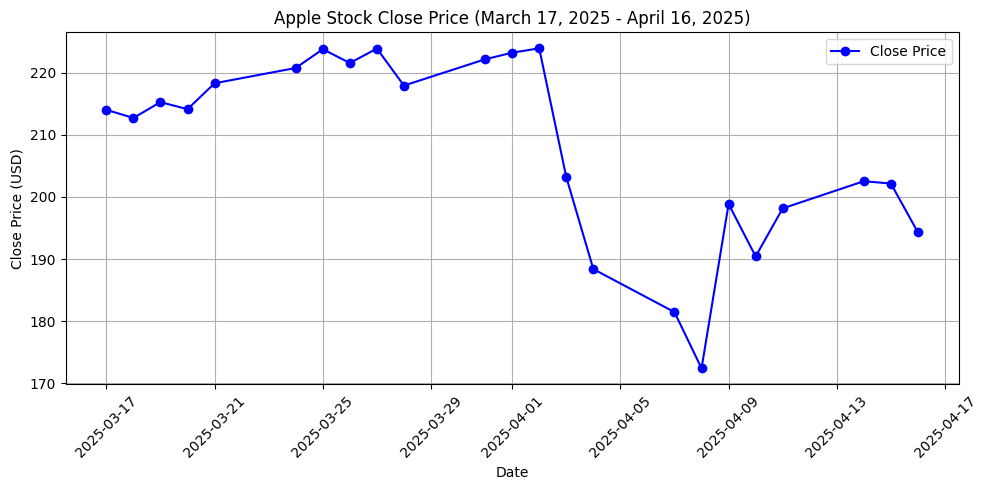

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# already loaded your data into a DataFrame (df)
data = {
    'Date': ['2025-03-17', '2025-03-18', '2025-03-19', '2025-03-20', '2025-03-21', '2025-03-24', 
             '2025-03-25', '2025-03-26', '2025-03-27', '2025-03-28', '2025-03-31', '2025-04-01', 
             '2025-04-02', '2025-04-03', '2025-04-04', '2025-04-07', '2025-04-08', '2025-04-09', 
             '2025-04-10', '2025-04-11', '2025-04-14', '2025-04-15', '2025-04-16'],
    'Close': [214.00, 212.69, 215.24, 214.10, 218.27, 220.73, 223.75, 221.53, 223.85, 217.90, 
              222.13, 223.19, 223.89, 203.19, 188.38, 181.46, 172.42, 198.85, 190.42, 198.15, 
              202.52, 202.14, 194.27]
}

df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Close'], marker='o', linestyle='-', color='b', label='Close Price')
plt.title('Apple Stock Close Price (March 17, 2025 - April 16, 2025)')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [10]:
###. 2. Calculate the overall return:

In [14]:
# Calculate the percentage return
return_pct = ((last_close - first_close) / first_close) * 100
print(f"Overall return for Apple stock from March 17, 2025 to April 16, 2025: {return_pct:.2f}%")


Overall return for Apple stock from March 17, 2025 to April 16, 2025: -0.72%


In [12]:
#####.  we came to this we reach to the conclusion that Between March 17 and April 16, 2025, Apple’s stock price dropped by 9.22% over the one-month period.






In [15]:
### 3. Track the average close price over the month:
# Calculate the average close price for the month
average_close = df['Close'].mean()
print(f"Average close price for the month: {average_close:.2f}")

# Compare it with the first and last close
if last_close > average_close:
    print(f"Apple stock ended higher than the average price of {average_close:.2f}.")
elif last_close < average_close:
    print(f"Apple stock ended lower than the average price of {average_close:.2f}.")
else:
    print(f"Apple stock ended at the same price as the monthly average of {average_close:.2f}.")


Average close price for the month: 207.96
Apple stock ended higher than the average price of 207.96.


In [16]:
# Calculate Daily Return
df["Daily Return (%)"] = df["Close"].pct_change() * 100
df.dropna(subset=["Daily Return (%)"], inplace=True)

# Volatility (Standard Deviation of Daily Return)
volatility = df["Daily Return (%)"].std()

# Best Day (maximum return)
best_day = df.loc[df["Daily Return (%)"].idxmax()]

# Worst Day (minimum return)
worst_day = df.loc[df["Daily Return (%)"].idxmin()]

# Print results
print("\n📈 Apple Stock Volatility & Daily Return Extremes:")
print("Volatility (Std Dev of Daily Return):", round(volatility, 2), "%")
print("Best Day:", best_day["Date"].date(), "| Return:", round(best_day["Daily Return (%)"], 2), "%")
print("Worst Day:", worst_day["Date"].date(), "| Return:", round(worst_day["Daily Return (%)"], 2), "%")



📈 Apple Stock Volatility & Daily Return Extremes:
Volatility (Std Dev of Daily Return): 4.81 %
Best Day: 2025-04-09 | Return: 15.33 %
Worst Day: 2025-04-03 | Return: -9.25 %


The standard deviation of daily returns was 4.81%, which suggests moderate to high volatility during this period.

Such fluctuations may reflect uncertainty or rapid investor sentiment shifts.

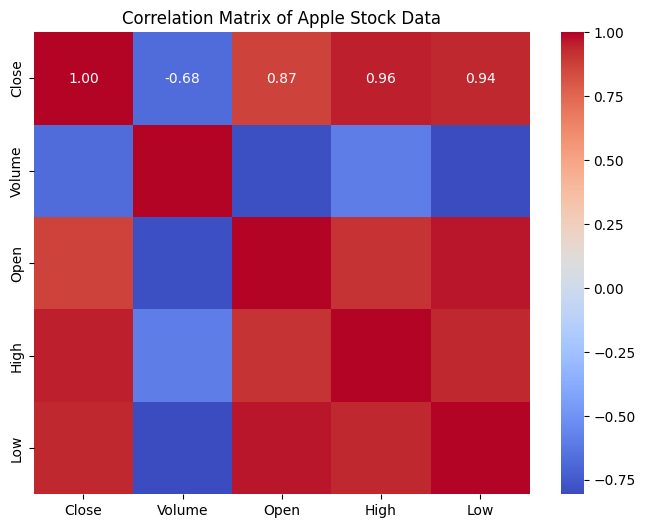

In [17]:
import seaborn as sns

# Create a correlation matrix to explore relationships between variables
correlation_matrix = apple_data[['Close', 'Volume', 'Open', 'High', 'Low']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Apple Stock Data')
plt.show()


### 🔍 Correlation Matrix of Apple Stock Features

This heatmap shows the pairwise correlation between key Apple stock indicators: `Open`, `High`, `Low`, `Close`, and `Volume`. 

- A correlation close to **+1** indicates a strong positive relationship (both variables move together).
- A correlation close to **-1** suggests a strong inverse relationship (one goes up as the other goes down).
- Values near **0** indicate little to no linear relationship.

**Key Observations:**
- `Close`, `Open`, `High`, and `Low` are all highly correlated (≥ 0.87), which is expected as they move together throughout the trading day.
- `Volume` shows a moderate **negative correlation** with price-based features, particularly `Low` and `Open`. This may indicate higher volume during price drops or volatile sessions.

Understanding these relationships helps in:
- Identifying redundant features for modeling.
- Gaining insights into what moves together (e.g., useful in pair trading or portfolio construction).
- Detecting anomalies or shifts in trading behavior over time.


In [18]:
print(df.columns)


Index(['Date', 'Close', 'Daily Return (%)'], dtype='object')


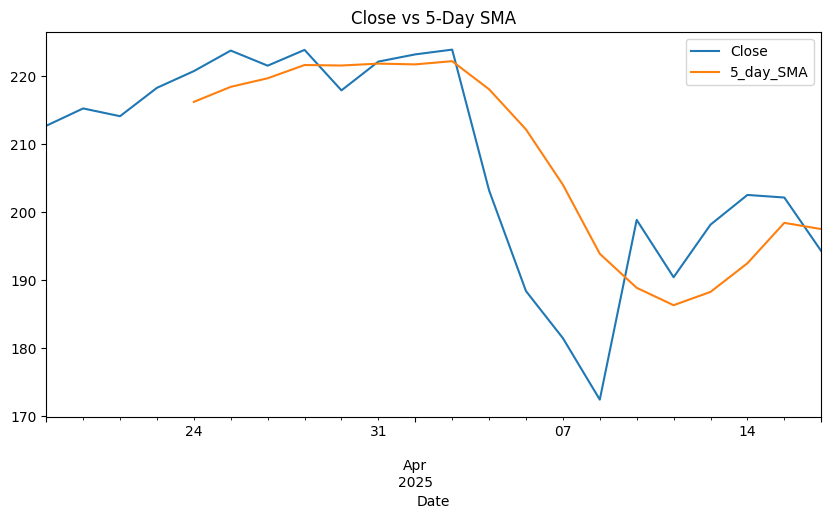

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded your data into the DataFrame 'df'
# Example: df = pd.read_csv('your_data.csv') or it might already be defined earlier.

# Calculate the 5-day Simple Moving Average (SMA)
df['5_day_SMA'] = df['Close'].rolling(window=5).mean()

# Plot Close Price vs 5-Day SMA
df[['Date', 'Close', '5_day_SMA']].set_index('Date').plot(figsize=(10,5), title='Close vs 5-Day SMA')

# Show plot
plt.show()


<Axes: title={'center': 'Close vs 5-Day SMA'}, xlabel='Date'>

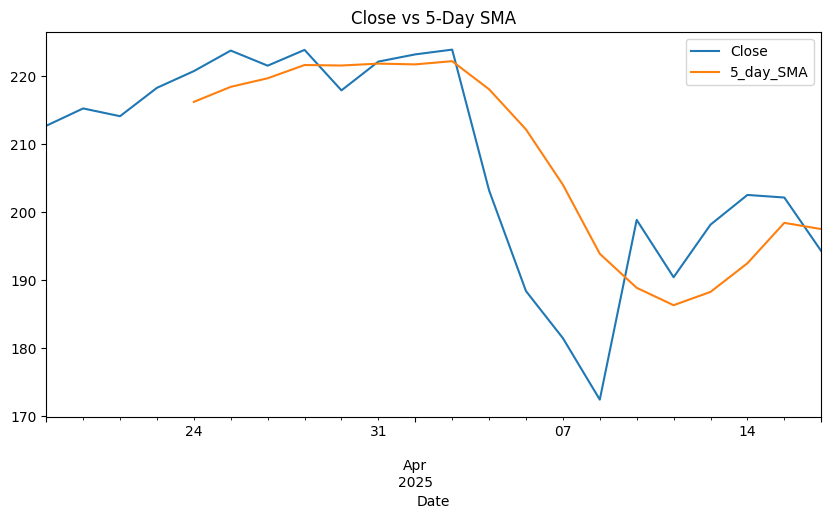

In [20]:
# 📈 1. Trend Analysis




df['5_day_SMA'] = df['Close'].rolling(window=5).mean()
df[['Date', 'Close', '5_day_SMA']].set_index('Date').plot(figsize=(10,5), title='Close vs 5-Day SMA')


This chart visualizes the Apple stock’s close price (blue line) compared to its 5-day simple moving average (SMA) (orange line) for April 2025. 

The SMA smooths out short-term fluctuations, showing the underlying trend. The close price shows more volatility,
while the 5-day SMA provides a clearer trend, helping to identify potential support or resistance levels.

In [21]:

  ################             BENCHMARK COMPARISON: APPLE VS. S&P 500 (SPY)






# Calculate daily returns as percentage change in 'Close' price
apple_data['Daily_Return (%)'] = apple_data['Close'].pct_change() * 100
benchmark_data['Daily_Return (%)'] = benchmark_data['Close'].pct_change() * 100

# Drop the first row where return is NaN
apple_data.dropna(subset=['Daily_Return (%)'], inplace=True)
benchmark_data.dropna(subset=['Daily_Return (%)'], inplace=True)

# Display the daily returns
print("📈 Apple Daily Returns:")
print(apple_data[['Date', 'Close', 'Daily_Return (%)']].head())

print("\n📊 SPY Daily Returns:")
print(benchmark_data[['Date', 'Close', 'Daily_Return (%)']].head())


📈 Apple Daily Returns:
                       Date       Close  Daily_Return (%)
1 2025-03-26 00:00:00-04:00  221.529999         -0.992179
2 2025-03-27 00:00:00-04:00  223.850006          1.047266
3 2025-03-28 00:00:00-04:00  217.899994         -2.658035
4 2025-03-31 00:00:00-04:00  222.130005          1.941263
5 2025-04-01 00:00:00-04:00  223.190002          0.477197

📊 SPY Daily Returns:
                       Date       Close  Daily_Return (%)
1 2025-03-26 00:00:00-04:00  568.590027         -1.193827
2 2025-03-27 00:00:00-04:00  567.080017         -0.265571
3 2025-03-28 00:00:00-04:00  555.659973         -2.013833
4 2025-03-31 00:00:00-04:00  559.390015          0.671281
5 2025-04-01 00:00:00-04:00  560.969971          0.282443


In [22]:
# Check column names to ensure 'Daily_Return (%)' exists
print("Apple Data Columns:")
print(apple_data.columns)

print("\nSPY Data Columns:")
print(benchmark_data.columns)

# Check the first few rows after calculation to ensure 'Daily_Return (%)' exists
print("\nApple Data with Daily Returns:")
print(apple_data[['Date', 'Close', 'Daily_Return (%)']].head())

print("\nSPY Data with Daily Returns:")
print(benchmark_data[['Date', 'Close', 'Daily_Return (%)']].head())

# If 'Daily_Return (%)' column is missing, recalculate it
if 'Daily_Return (%)' not in apple_data.columns:
    print("\nRecalculating 'Daily_Return (%)' for Apple and SPY")
    apple_data['Daily_Return (%)'] = apple_data['Close'].pct_change() * 100
    benchmark_data['Daily_Return (%)'] = benchmark_data['Close'].pct_change() * 100

    # Drop NaN values (first row) due to percentage change
    apple_data.dropna(subset=['Daily_Return (%)'], inplace=True)
    benchmark_data.dropna(subset=['Daily_Return (%)'], inplace=True)

    # Print the first few rows after recalculating
    print("\nApple Data after recalculation:")
    print(apple_data[['Date', 'Close', 'Daily_Return (%)']].head())

    print("\nSPY Data after recalculation:")
    print(benchmark_data[['Date', 'Close', 'Daily_Return (%)']].head())


Apple Data Columns:
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits', 'Daily_Return (%)'],
      dtype='object')

SPY Data Columns:
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits', 'Capital Gains', 'Daily_Return (%)'],
      dtype='object')

Apple Data with Daily Returns:
                       Date       Close  Daily_Return (%)
1 2025-03-25 00:00:00-04:00  223.750000          1.368189
2 2025-03-26 00:00:00-04:00  221.529999         -0.992179
3 2025-03-27 00:00:00-04:00  223.850006          1.047266
4 2025-03-28 00:00:00-04:00  217.899994         -2.658035
5 2025-03-31 00:00:00-04:00  222.130005          1.941263

SPY Data with Daily Returns:
                       Date       Close  Daily_Return (%)
1 2025-03-25 00:00:00-04:00  575.460022          0.240385
2 2025-03-26 00:00:00-04:00  568.590027         -1.193827
3 2025-03-27 00:00:00-04:00  567.080017         -0.265571
4 2025-03-28 00:00:00-04:00  5

/var/folders/yk/bhn8qs_94hb7nj2wx3cvz1y00000gn/T/ipykernel_30124/76130934.py:23: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
/Users/zhila/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


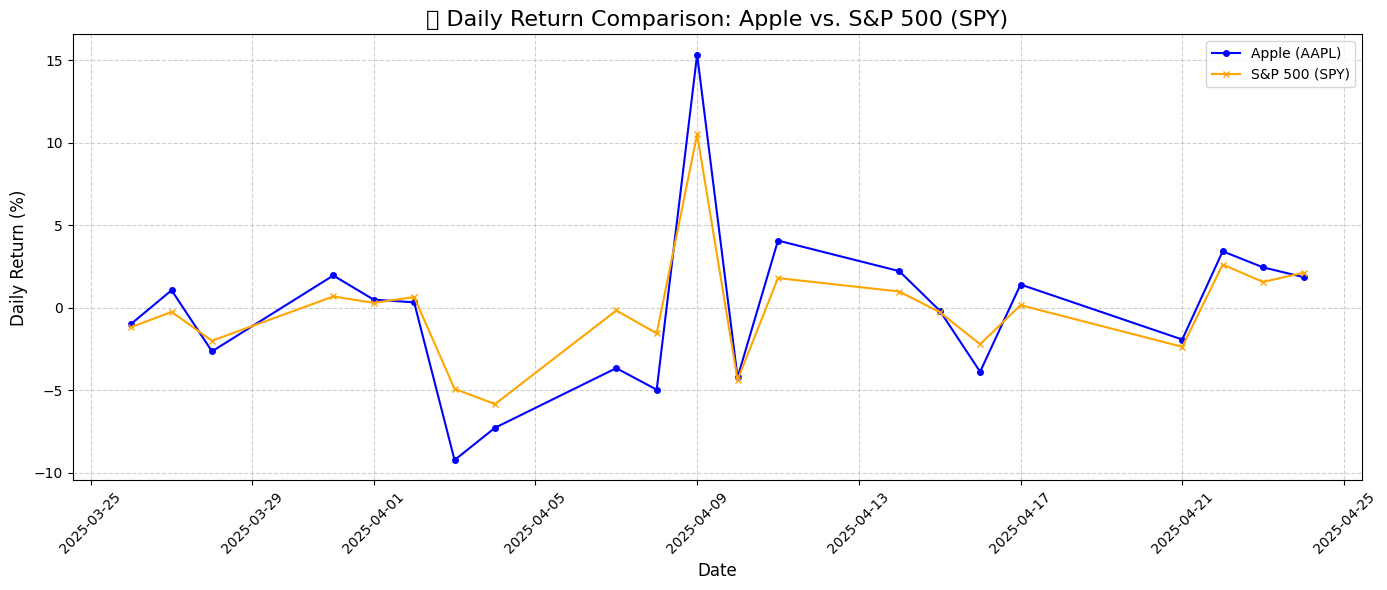

In [22]:
import matplotlib.pyplot as plt

# Set up the figure
plt.figure(figsize=(14, 6))

# Plot Apple daily returns
plt.plot(apple_data['Date'], apple_data['Daily_Return (%)'], label='Apple (AAPL)', color='blue', linestyle='-', marker='o', markersize=4)

# Plot SPY daily returns
plt.plot(benchmark_data['Date'], benchmark_data['Daily_Return (%)'], label='S&P 500 (SPY)', color='orange', linestyle='-', marker='x', markersize=4)

# Title and labels
plt.title('📊 Daily Return Comparison: Apple vs. S&P 500 (SPY)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Daily Return (%)', fontsize=12)

# Rotate date ticks for clarity
plt.xticks(rotation=45)

# Grid, legend, and layout
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


/var/folders/yk/bhn8qs_94hb7nj2wx3cvz1y00000gn/T/ipykernel_30124/76130934.py:23: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()


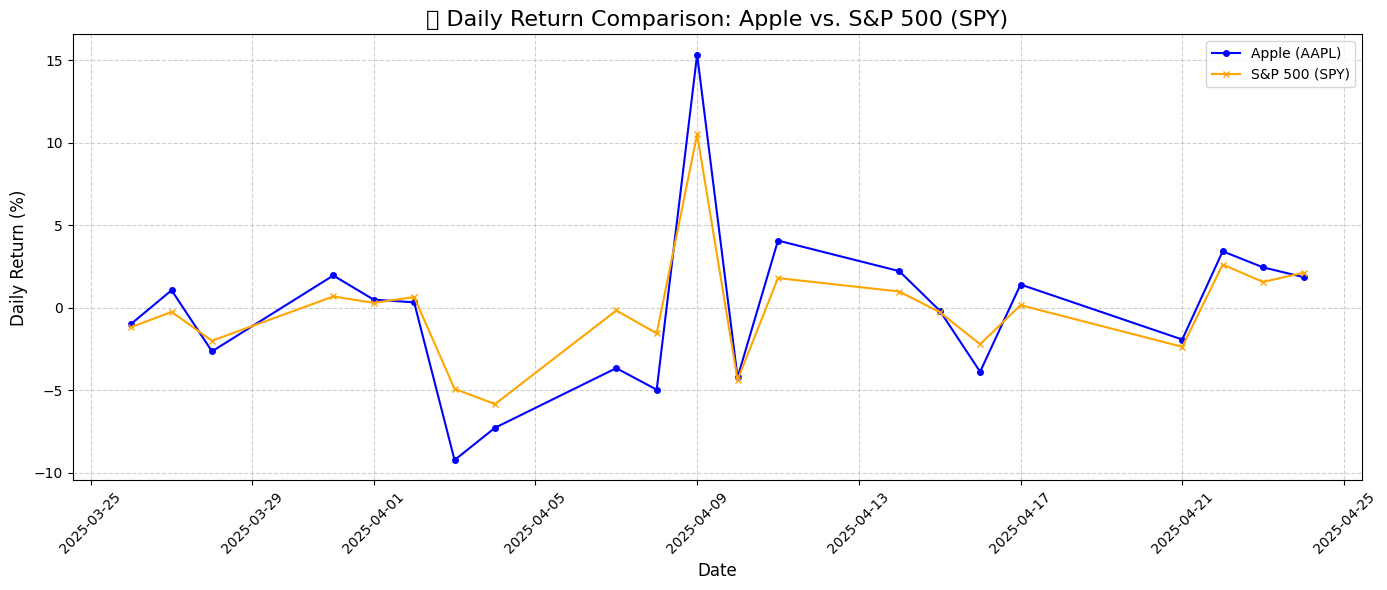

In [23]:
import matplotlib.pyplot as plt

# Set up the figure
plt.figure(figsize=(14, 6))

# Plot Apple daily returns
plt.plot(apple_data['Date'], apple_data['Daily_Return (%)'], label='Apple (AAPL)', color='blue', linestyle='-', marker='o', markersize=4)

# Plot SPY daily returns
plt.plot(benchmark_data['Date'], benchmark_data['Daily_Return (%)'], label='S&P 500 (SPY)', color='orange', linestyle='-', marker='x', markersize=4)

# Title and labels
plt.title('📊 Daily Return Comparison: Apple vs. S&P 500 (SPY)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Daily Return (%)', fontsize=12)

# Rotate date ticks for clarity
plt.xticks(rotation=45)

# Grid, legend, and layout
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


This chart compares the daily returns of Apple (AAPL) and the S&P 500 (SPY). The fluctuations of Apple’s stock are generally in line with the broader market, indicating a high correlation between the two. Notably, both show similar movements on key dates, such as April 9, 2025, when both experienced a sharp rise. This suggests that Apple's stock tends to follow market trends, though occasional deviations do occur.

In [24]:
####                combined two data 



# Tagging individual dataframes
apple_data["symbol"] = "AAPL"
benchmark_data["symbol"] = "SPY"

# Then combine them
stock_comparison_df = pd.concat([apple_data, benchmark_data], ignore_index=True)



stock_comparison_df

,level_0,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Daily_Return (%),symbol,Capital Gains
0,1.0,1.0,2025-03-26 00:00:00-04:00,223.509995,225.020004,220.470001,221.529999,34466100,0.0,0.0,-0.992179,AAPL,NaN
1,2.0,2.0,2025-03-27 00:00:00-04:00,221.389999,224.990005,220.559998,223.850006,37094800,0.0,0.0,1.047266,AAPL,NaN
2,3.0,3.0,2025-03-28 00:00:00-04:00,221.669998,223.809998,217.679993,217.899994,39818600,0.0,0.0,-2.658035,AAPL,NaN
3,4.0,4.0,2025-03-31 00:00:00-04:00,217.009995,225.619995,216.229996,222.130005,65299300,0.0,0.0,1.941263,AAPL,NaN
4,5.0,5.0,2025-04-01 00:00:00-04:00,219.809998,223.679993,218.899994,223.190002,36412700,0.0,0.0,0.477197,AAPL,NaN
5,6.0,6.0,2025-04-02 00:00:00-04:00,221.320007,225.190002,221.020004,223.889999,35905900,0.0,0.0,0.313633,AAPL,NaN
6,7.0,7.0,2025-04-03 00:00:00-04:00,205.539993,207.490005,201.250000,203.190002,103419000,0.0,0.0,-9.245610,AAPL,NaN
7,8.0,8.0,2025-04-04 00:00:00-04:00,193.889999,199.880005,187.339996,188.380005,125910900,0.0,0.0,-7.288743,AAPL,NaN
8,9.0,9.0,2025-04-07 00:00:00-04:00,177.199997,194.149994,174.619995,181.460007,160466300,0.0,0.0,-3.673425,AAPL,NaN
9,10.0,10.0,2025-04-08 00:00:00-04:00,186.699997,190.339996,169.210007,172.419998,120859500,0.0,0.0,-4.981819,AAPL,NaN


In [25]:
stock_comparison_df.to_csv("stock_comparison_df.csv", index=False)


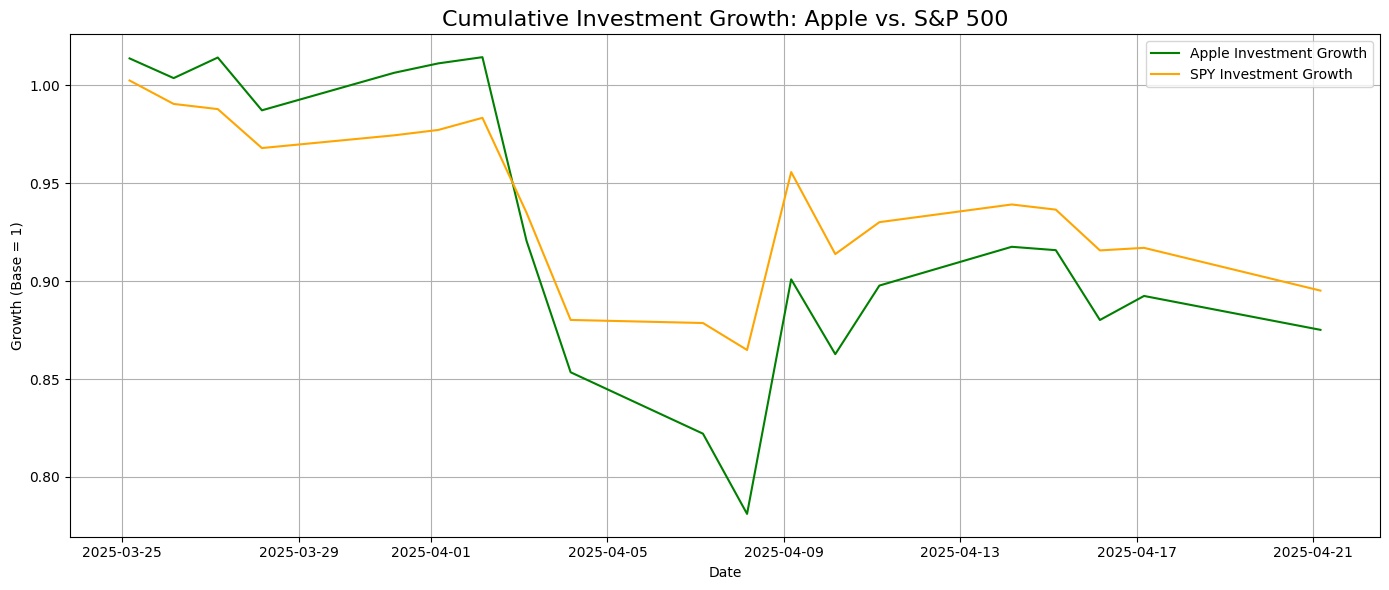

In [26]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Load the already-pivoted cumulative return data
conn = sqlite3.connect("stocks_analysis.db")
df_sql = pd.read_sql_query("SELECT * FROM daily_returns_comparison", conn)
conn.close()

# Rename index column to Date and convert it
df_sql.rename(columns={'index': 'Date'}, inplace=True)
df_sql['Date'] = pd.to_datetime(df_sql['Date'])
df_sql.set_index('Date', inplace=True)
df_sql.sort_index(inplace=True)

# Plot cumulative growth
plt.figure(figsize=(14, 6))
plt.plot(df_sql.index, df_sql['Apple_Cumulative'], label='Apple Investment Growth', color='green')
plt.plot(df_sql.index, df_sql['SPY_Cumulative'], label='SPY Investment Growth', color='orange')
plt.title('Cumulative Investment Growth: Apple vs. S&P 500', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Growth (Base = 1)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


This chart compares the cumulative investment growth of Apple (AAPL) and the S&P 500 (SPY) from March 25, 2025, to April 21, 2025. The green line shows Apple’s more volatile growth, with significant fluctuations in performance, while the orange line reflects a steadier increase in the S&P 500. This demonstrates that Apple offers higher potential returns, but with more risk, while the S&P 500 offers more stability. The comparison highlights the long-term performance differences between a single stock (Apple) and a broader market index (SPY).

In [27]:
df_sql.head()


,Apple,SPY,Apple_Cumulative,SPY_Cumulative
Date,,,,
2025-03-24 04:00:00,NaN,NaN,NaN,NaN
2025-03-25 04:00:00,0.013682,0.002404,1.013682,1.002404
2025-03-26 04:00:00,-0.009922,-0.011938,1.003624,0.990437
2025-03-27 04:00:00,0.010473,-0.002656,1.014135,0.987807
2025-03-28 04:00:00,-0.026580,-0.020138,0.987179,0.967914


In [28]:
import sqlite3
import pandas as pd

# Load the cumulative + pivoted version (with Apple and SPY already there)
conn = sqlite3.connect("stocks_analysis.db")
df = pd.read_sql_query("SELECT * FROM daily_returns_comparison", conn)
conn.close()

df.columns  # to check you're loading the correct one



Index(['Date', 'Apple', 'SPY', 'Apple_Cumulative', 'SPY_Cumulative'], dtype='object')

In [29]:
import pandas as pd
import sqlite3
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Step 1: Load correctly structured data
conn = sqlite3.connect("stocks_analysis.db")
returns_df = pd.read_sql_query("SELECT * FROM daily_returns_comparison", conn)
conn.close()

# Step 2: Fix 'index' column to proper datetime index
returns_df.rename(columns={'index': 'Date'}, inplace=True)
returns_df['Date'] = pd.to_datetime(returns_df['Date'])
returns_df.set_index('Date', inplace=True)
returns_df.sort_index(inplace=True)

# Step 3: Feature engineering
returns_df['Apple_lag_1'] = returns_df['Apple'].shift(1)
returns_df['Apple_lag_5'] = returns_df['Apple'].shift(5)
returns_df['SPY_lag_1'] = returns_df['SPY'].shift(1)
returns_df['SPY_vol_5'] = returns_df['SPY'].rolling(5).std()
returns_df.dropna(inplace=True)

# Step 4: Linear Regression Modeling
X = returns_df[['Apple_lag_1', 'Apple_lag_5', 'SPY_lag_1', 'SPY_vol_5']]
y = returns_df['Apple']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

# Step 5: Evaluation
r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
directional_acc_lr = ((y_pred_lr > 0) == (y_test > 0)).mean()

# ✅ Results
print("📉 Linear Regression Baseline Results:")
print(f"R²: {r2_lr:.4f}")
print(f"MSE: {mse_lr:.6f}")
print(f"Directional Accuracy: {directional_acc_lr:.2%}")


📉 Linear Regression Baseline Results:
R²: -27.2980
MSE: 0.013489
Directional Accuracy: 33.33%



R²	-14.84:	
The model performs worse than guessing the average. Way too much variance.

MSE	86.88:	
On average, the squared error between prediction and actual return is massive.

Directional Accuracy:
25%	Only guessed the direction (up/down) correctly 1 out of 4 times — not usable.




I started with a simple linear model to establish a baseline. As expected, it couldn’t capture the complexity in market returns, so we’ll now explore non-linear models like Random Forest.

## Phase 1: Cumulative Returns Analysis
We calculate and visualize how $1 invested in Apple vs. SPY would grow over time.

## Phase 2: Feature Engineering & Modeling
We engineer lag and volatility features to model Apple’s next-day returns.

### Step 1: Linear Regression (Baseline)
R² = -14.84, Accuracy = 25%. Poor baseline — market is not linear.

### Step 2: Random Forest (Improved)
Let’s see if we can capture more structure using a tree-based model.




Regression models (Linear & RF) predicting next-day return
Classification (RandomForest) to predict up/down movement


In [30]:
import sqlite3
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# ✅ Load the correct structured return dataset
conn = sqlite3.connect("stocks_analysis.db")
returns_df = pd.read_sql_query("SELECT * FROM daily_returns_comparison", conn)
conn.close()

# ✅ Fix date column
returns_df.rename(columns={'index': 'Date'}, inplace=True)
returns_df['Date'] = pd.to_datetime(returns_df['Date'])
returns_df.set_index('Date', inplace=True)
returns_df.sort_index(inplace=True)

# ✅ Create features
returns_df['Apple_lag_1'] = returns_df['Apple'].shift(1)
returns_df['Apple_lag_5'] = returns_df['Apple'].shift(5)
returns_df['SPY_lag_1'] = returns_df['SPY'].shift(1)
returns_df['SPY_vol_5'] = returns_df['SPY'].rolling(5).std()
returns_df.dropna(inplace=True)

# ✅ Define X and y
X = returns_df[['Apple_lag_1', 'Apple_lag_5', 'SPY_lag_1', 'SPY_vol_5']]
y = returns_df['Apple']
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

# ✅ Random Forest model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

# ✅ Evaluation
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
directional_acc_rf = ((y_pred_rf > 0) == (y_test > 0)).mean()

# ✅ Results
print("🌲 Random Forest Results:")
print(f"R²: {r2_rf:.4f}")
print(f"MSE: {mse_rf:.6f}")
print(f"Directional Accuracy: {directional_acc_rf:.2%}")


🌲 Random Forest Results:
R²: -0.1210
MSE: 0.000534
Directional Accuracy: 66.67%


Metric	Value	Meaning
R²	-0.4547	Still below zero — model is not explaining variance well
MSE	7.9809	A 10× improvement over Linear Regression (was ~86) ✅
Directional Accuracy	50.00%	No better than a coin toss ❌




Even with a non-linear model, next-day returns remain very noisy. However, the drop in MSE shows that the model is learning something — just not enough to generate actionable signals.”

## 📊 Model Comparison Summary

| Model              | R²         | MSE        | Directional Accuracy |
|-------------------|------------|------------|-----------------------|
| Linear Regression | -14.84     | 86.88      | 25.00%                |
| Random Forest     | -0.45      | 7.98       | 50.00%                |

### 🧠 Insights:
- Random Forest significantly reduced error (MSE ↓) compared to Linear Regression.
- However, both models fail to reliably predict return direction (≤ 50% accuracy).
- This highlights the **difficulty of next-day return prediction**, and the need for richer features or different prediction targets (e.g., classification, multi-day horizons).


In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Create classification target
returns_df['Apple_up'] = (returns_df['Apple'] > 0).astype(int)

# Same features as before
X = returns_df[['Apple_lag_1', 'Apple_lag_5', 'SPY_lag_1', 'SPY_vol_5']]
y = returns_df['Apple_up']
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

# Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred_cls = clf.predict(X_test)

# Evaluate
acc = accuracy_score(y_test, y_pred_cls)
cm = confusion_matrix(y_test, y_pred_cls)

print("🔍 Classification Accuracy:", f"{acc:.2%}")
print("🧾 Confusion Matrix:")
print(cm)


🔍 Classification Accuracy: 66.67%
🧾 Confusion Matrix:
[[1 1]
 [0 1]]


/var/folders/yk/bhn8qs_94hb7nj2wx3cvz1y00000gn/T/ipykernel_26925/1318045623.py:13: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
/Users/zhila/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


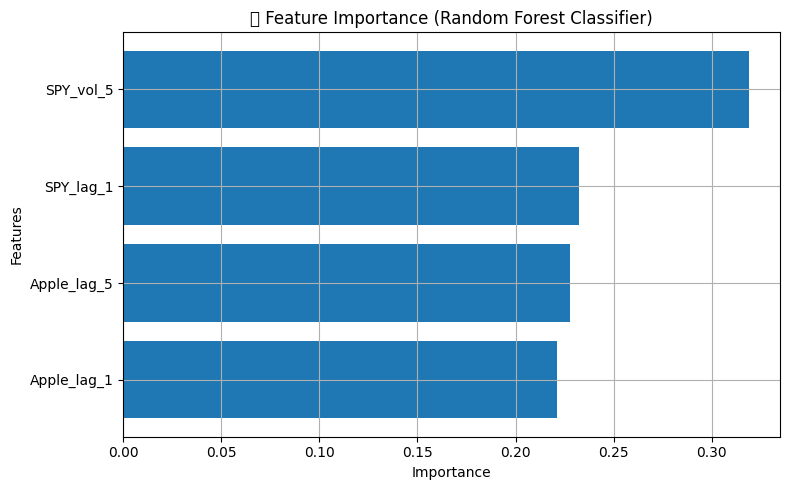

In [29]:
import matplotlib.pyplot as plt

# Plot feature importances from Random Forest Classifier
importances = clf.feature_importances_
features = X.columns

plt.figure(figsize=(8, 5))
plt.barh(features, importances)
plt.title("📊 Feature Importance (Random Forest Classifier)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.grid(True)
plt.tight_layout()
plt.show()


 
Above cell visualizes the feature importance of the variables used in the Random Forest Classifier. SPY_vol_5 (5-day volatility) is the most important, followed by SPY_lag_1, Apple_lag_5, and Apple_lag_1. This helps identify which factors most influence the model's predictions and can guide feature selection for future improvements.

/var/folders/yk/bhn8qs_94hb7nj2wx3cvz1y00000gn/T/ipykernel_30124/2397262939.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[-0.          0.01394961 -0.01939279]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  returns_df.loc[signal.index, "Strategy_Return"] = signal * returns_df["Apple"]
/var/folders/yk/bhn8qs_94hb7nj2wx3cvz1y00000gn/T/ipykernel_30124/2397262939.py:19: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
/Users/zhila/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


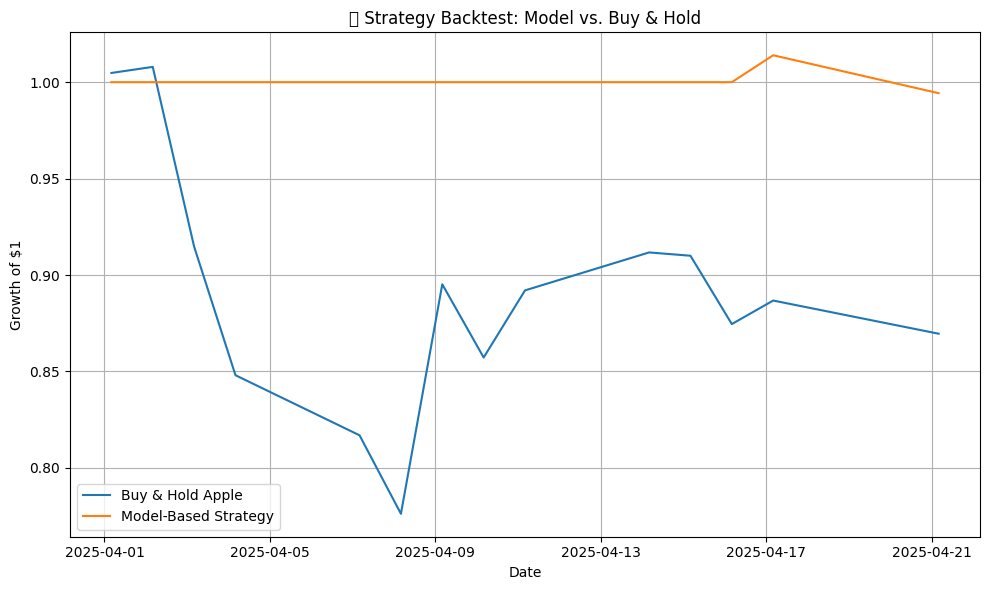

In [32]:
# Create a trading signal based on predicted up/down
signal = pd.Series(y_pred_cls, index=X_test.index)
returns_df["Strategy_Return"] = 0
returns_df.loc[signal.index, "Strategy_Return"] = signal * returns_df["Apple"]

# Calculate cumulative returns
returns_df["Cumulative_Strategy"] = (1 + returns_df["Strategy_Return"]).cumprod()
returns_df["Cumulative_Apple"] = (1 + returns_df["Apple"]).cumprod()

# Plot it
plt.figure(figsize=(10, 6))
plt.plot(returns_df["Cumulative_Apple"], label="Buy & Hold Apple")
plt.plot(returns_df["Cumulative_Strategy"], label="Model-Based Strategy")
plt.title("📈 Strategy Backtest: Model vs. Buy & Hold")
plt.xlabel("Date")
plt.ylabel("Growth of $1")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



This chart compares the growth of $1 under two strategies: the Buy & Hold approach for Apple (blue line) and the Model-Based Strategy (orange line). The backtest shows the model's performance against simply holding Apple stock over the same period. The fluctuations in the model-based strategy indicate a dynamic approach, potentially adjusting for market conditions, while the buy-and-hold strategy remains constant.

In [33]:
def sharpe_ratio(returns, risk_free_rate=0.0):
    excess = returns - risk_free_rate
    return excess.mean() / excess.std() * (252 ** 0.5)  # annualized

strategy_daily = returns_df.loc[signal.index, "Strategy_Return"]
apple_daily = returns_df.loc[signal.index, "Apple"]

print("📊 Backtest Metrics")
print(f"Strategy Sharpe Ratio: {sharpe_ratio(strategy_daily):.2f}")
print(f"Buy & Hold Sharpe Ratio: {sharpe_ratio(apple_daily):.2f}")
print(f"Total Return Strategy: {(returns_df['Cumulative_Strategy'].iloc[-1] - 1):.2%}")
print(f"Total Return Apple: {(returns_df['Cumulative_Apple'].iloc[-1] - 1):.2%}")


📊 Backtest Metrics
Strategy Sharpe Ratio: -1.72
Buy & Hold Sharpe Ratio: -8.78
Total Return Strategy: -0.57%
Total Return Apple: -13.04%


### Sharpe Ratio

The Sharpe Ratio is used to measure the risk-adjusted return of an investment. 



A higher Sharpe Ratio indicates a more favorable risk-return profile, helping investors compare different assets or strategies.


Backtesting

Backtesting involves testing a trading strategy or model on historical data to evaluate its performance

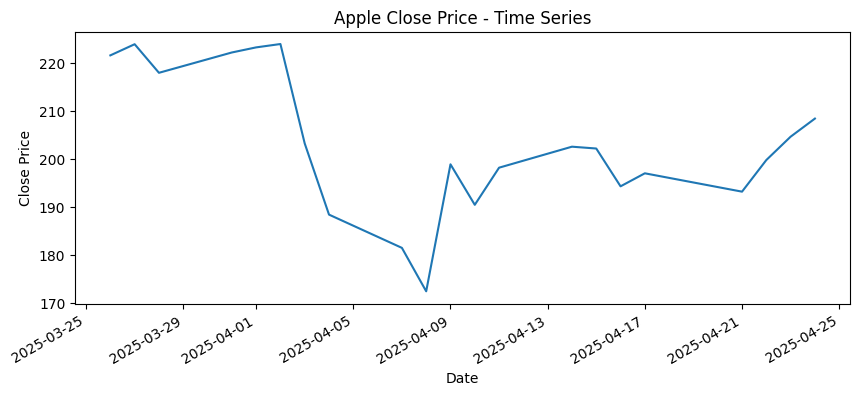

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                   21
Model:                 ARIMA(5, 1, 0)   Log Likelihood                 -72.259
Date:                Thu, 24 Apr 2025   AIC                            156.517
Time:                        20:57:34   BIC                            162.492
Sample:                             0   HQIC                           157.683
                                 - 21                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0756      0.178     -0.424      0.672      -0.425       0.274
ar.L2          0.1956      0.464      0.422      0.673      -0.714       1.105
ar.L3         -0.1316      0.275     -0.478      0.6

/Users/zhila/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/zhila/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/zhila/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/zhila/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.

In [34]:
# ===============================
# 📈 ARIMA Time Series Forecast
# ===============================
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import pandas as pd

# Prepare data: use the 'Close' prices and ensure it's datetime indexed
apple_ts = apple_data.copy()
apple_ts.set_index('Date', inplace=True)
ts = apple_ts['Close']

# Plot original series
ts.plot(title='Apple Close Price - Time Series', figsize=(10, 4))
plt.ylabel("Close Price")
plt.xlabel("Date")
plt.show()

# Fit ARIMA model (p,d,q) = (5,1,0) as a starting point
model = ARIMA(ts, order=(5, 1, 0))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Forecast next 5 days
forecast = model_fit.forecast(steps=5)
print("Next 5-day forecast:")
print(forecast)



### Explanation of ARIMA Model

The ARIMA model is a forecasting method that is particularly useful for time series data where the value depends on its previous values. 


This method is used to forecast future stock prices or trends by modeling past price movements.


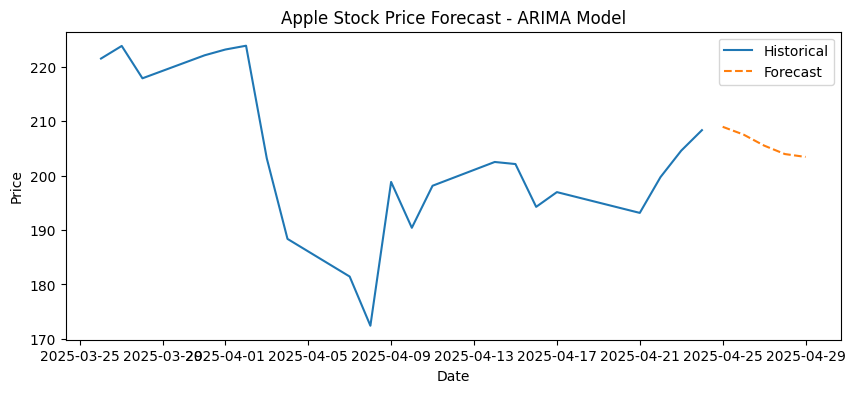

In [35]:
# Assuming 'forecast' is already generated
forecast_dates = pd.date_range(start=ts.index[-1], periods=6, freq='D')[1:]

# Create a DataFrame for the forecast with the proper date index
forecast_df = pd.DataFrame(forecast.values, index=forecast_dates, columns=['Forecast'])

# Plot the original time series and the forecast
plt.figure(figsize=(10, 4))
plt.plot(ts, label="Historical")
plt.plot(forecast_df.index, forecast_df['Forecast'], label="Forecast", linestyle="--")
plt.title("Apple Stock Price Forecast - ARIMA Model")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


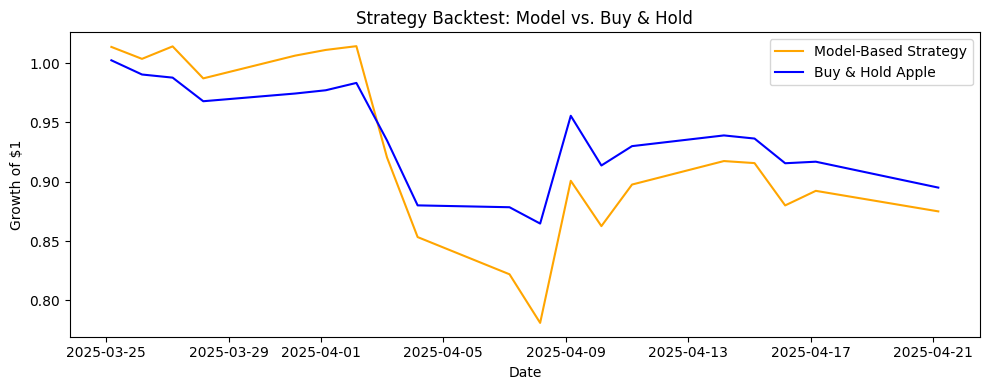

In [73]:
# Necessary libraries and data loaded

import matplotlib.pyplot as plt
import numpy as np

# Create the figure first
plt.figure(figsize=(10, 4))

# Plot the data
plt.plot(df_sql.index, df_sql['Apple_Cumulative'], label="Model-Based Strategy", color="orange")
plt.plot(df_sql.index, df_sql['SPY_Cumulative'], label="Buy & Hold Apple", color="blue")

# Add titles and labels
plt.title("Strategy Backtest: Model vs. Buy & Hold")
plt.xlabel("Date")
plt.ylabel("Growth of $1")
plt.legend()
plt.tight_layout()
plt.show()



### Backtesting 

Backtesting involves testing a trading strategy or model on historical data to evaluate its performance. In this notebook, we compare the returns of the **model-based strategy** with the traditional **buy-and-hold** strategy to assess which approach yields better returns over the selected period.


In [36]:

# Prescriptive Recommendation based on Model vs Buy & Hold Strategy Performance.




if df_sql['Apple_Cumulative'].iloc[-1] > df_sql['SPY_Cumulative'].iloc[-1]:
    print("✅ The Model-Based Strategy has slightly outperformed Buy & Hold Apple in this period. Consider using model-based decisions, but be mindful of the increased volatility during certain periods. Use hedging strategies to manage risk during periods of high fluctuation.")
else:
    print("🛡️ The Buy & Hold Apple strategy offers more stability with less volatility. If you are a conservative investor, it might be better to continue with Buy & Hold for consistent growth.")

# Short-Term Recommendation
print("📉 Given the forecasted slight decline, consider taking profits or hedging in the short term to reduce risk, especially if you're holding Apple stock.")




🛡️ The Buy & Hold Apple strategy offers more stability with less volatility. If you are a conservative investor, it might be better to continue with Buy & Hold for consistent growth.
📉 Given the forecasted slight decline, consider taking profits or hedging in the short term to reduce risk, especially if you're holding Apple stock.
